<a href="https://colab.research.google.com/github/ShrikantKGIT/ImageProcessing/blob/master/FaceRecog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install face_recognition

     |████████████████████████████████| 100.2MB 32kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566172 sha256=305711bf94eef1a169c72fa3cede75416d14db4ce8ffc24905ac4dd6d969b0ad
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


In [3]:
!mkdir known
!wget https://www.biography.com/.image/ar_1:1%2Cc_fill%2Ccs_srgb%2Cg_face%2Cq_auto:good%2Cw_300/MTY2MzU3Nzk2OTM2MjMwNTkx/elon_musk_royal_society.jpg -O known/elon.jpeg
!wget https://www.biography.com/.image/ar_1:1%2Cc_fill%2Ccs_srgb%2Cg_face%2Cq_auto:good%2Cw_300/MTY2MzU3MzIyODc5MjE1Mjk1/billgates2012.jpg -O known/bill.jpeg
!wget https://www.biography.com/.image/ar_1:1%2Cc_fill%2Ccs_srgb%2Cg_face%2Cq_auto:good%2Cw_300/MTE4MDAzNDEwNzg5ODI4MTEw/barack-obama-12782369-1-402.jpg -O known/obama.jpeg

--2020-06-07 02:37:12--  https://www.biography.com/.image/ar_1:1%2Cc_fill%2Ccs_srgb%2Cg_face%2Cq_auto:good%2Cw_300/MTY2MzU3Nzk2OTM2MjMwNTkx/elon_musk_royal_society.jpg
Resolving www.biography.com (www.biography.com)... 151.101.194.98, 151.101.130.98, 151.101.2.98, ...
Connecting to www.biography.com (www.biography.com)|151.101.194.98|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12148 (12K) [image/jpeg]
Saving to: ‘known/elon.jpeg’

known/elon.jpeg     100%[===================>]  11.86K  --.-KB/s    in 0s      

2020-06-07 02:37:12 (103 MB/s) - ‘known/elon.jpeg’ saved [12148/12148]

--2020-06-07 02:37:13--  https://www.biography.com/.image/ar_1:1%2Cc_fill%2Ccs_srgb%2Cg_face%2Cq_auto:good%2Cw_300/MTY2MzU3MzIyODc5MjE1Mjk1/billgates2012.jpg
Resolving www.biography.com (www.biography.com)... 151.101.194.98, 151.101.2.98, 151.101.130.98, ...
Connecting to www.biography.com (www.biography.com)|151.101.194.98|:443... connected.
HTTP request sent, awaiting response.

In [4]:
!mkdir unknown
!wget https://upload.wikimedia.org/wikipedia/commons/thumb/8/8d/President_Barack_Obama.jpg/220px-President_Barack_Obama.jpg -O unknown/1.jpeg
!wget https://upload.wikimedia.org/wikipedia/commons/thumb/e/ed/Elon_Musk_Royal_Society.jpg/220px-Elon_Musk_Royal_Society.jpg -O unknown/2.jpeg
!wget https://upload.wikimedia.org/wikipedia/commons/thumb/a/a0/Bill_Gates_2018.jpg/220px-Bill_Gates_2018.jpg -O unknown/3.jpeg
!wget https://upload.wikimedia.org/wikipedia/commons/thumb/6/6b/Sundar_Pichai_WEF_2020.png/220px-Sundar_Pichai_WEF_2020.png -O unknown/4.jpeg

--2020-06-07 02:37:20--  https://upload.wikimedia.org/wikipedia/commons/thumb/8/8d/President_Barack_Obama.jpg/220px-President_Barack_Obama.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 91.198.174.208, 2620:0:861:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|91.198.174.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22335 (22K) [image/jpeg]
Saving to: ‘unknown/1.jpeg’

unknown/1.jpeg      100%[===================>]  21.81K  --.-KB/s    in 0.004s  

2020-06-07 02:37:20 (4.91 MB/s) - ‘unknown/1.jpeg’ saved [22335/22335]

--2020-06-07 02:37:21--  https://upload.wikimedia.org/wikipedia/commons/thumb/e/ed/Elon_Musk_Royal_Society.jpg/220px-Elon_Musk_Royal_Society.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.154.240, 2620:0:862:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.154.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13575 (13K) [image/jpeg

Processing:  4.jpeg
[False, False, False]
Processing:  1.jpeg


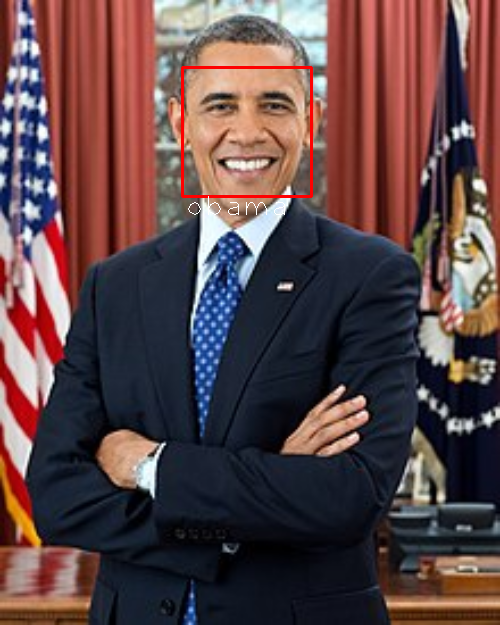

[False, True, False]
Processing:  2.jpeg


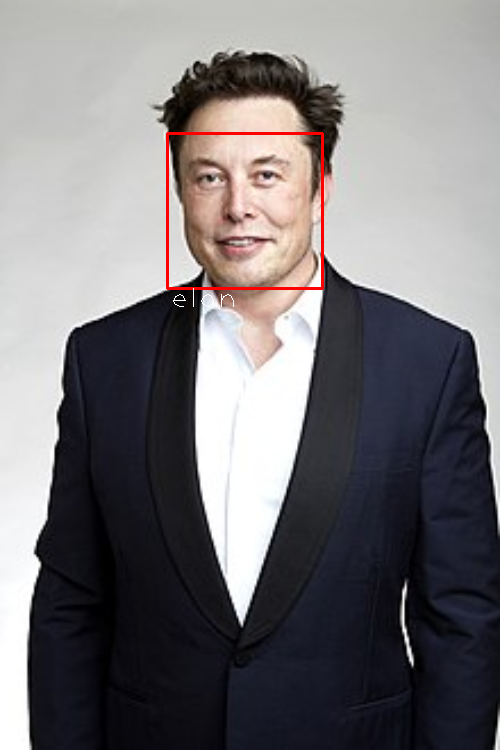

[True, False, False]
Processing:  3.jpeg


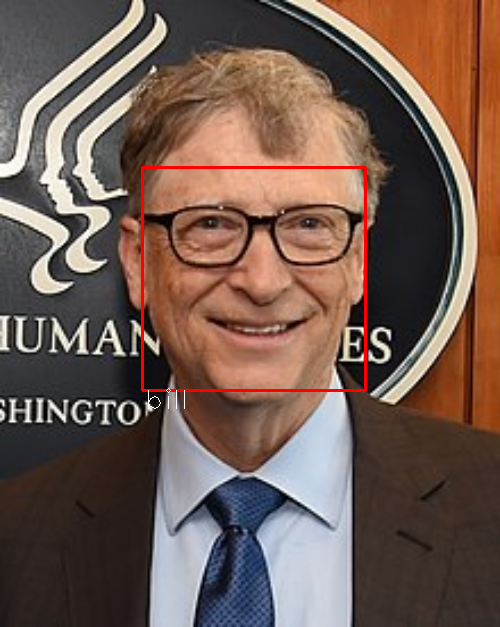

[False, False, True]


In [12]:
import face_recognition as fr
import cv2 as cv
import os
from google.colab.patches import cv2_imshow

def read_img(path):
  img = cv.imread(path)
  (h, w) = img.shape[:2]
  width = 500
  ratio = width / float(w)
  height = int(h * ratio)
  return cv.resize(img, (width, height))

known_encodings = []
known_names = []
known_dir = 'known'

for file in os.listdir(known_dir):
  img = read_img(known_dir + '/' + file)
  img_enc = fr.face_encodings(img)[0]
  known_encodings.append(img_enc)
  known_names.append(file.split('.')[0])

unknown_dir = 'unknown'
for file in os.listdir(unknown_dir):
  print("Processing: ", file)
  img = read_img(unknown_dir + '/' + file)
  img_enc = fr.face_encodings(img)[0]

  results = fr.compare_faces(known_encodings, img_enc)

  for i in range(len(results)):
    if results[i]:
      name = known_names[i]
      (top, right, bottom, left) = fr.face_locations(img)[0]
      cv.rectangle(img, (left, top), (right,bottom), (0,0,255), 2)
      cv.putText(img, name, (left+2,bottom+20), cv.FONT_HERSHEY_PLAIN, 2,(255, 255, 255), 1)
      cv2_imshow(img)
      

  print(results)
